In [1]:
import numpy as np
import pandas as pd


In [2]:
# Load the data file using pandas. 

data=pd.read_csv('googleplaystore.csv')


In [3]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
# Check for null values in the data. Get the number of null values for each column.
# Drop records with nulls in any of the columns.

data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [7]:
# Formatting inconsistent variables

print(data.Size.value_counts())
def change(Size):
    if 'M'in Size:
        x=Size[:-1]
        x=float(x)*1000
        return x
    elif 'k'in Size:
        x=Size[:-1]
        x=float(x)
        return x
    
    else: return None
    
data.Size=data.Size.map(change)
data.Size.value_counts()



Varies with device    1637
14M                    165
12M                    161
15M                    159
11M                    159
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 413, dtype: int64


14000.0    165
12000.0    161
15000.0    159
11000.0    159
13000.0    157
          ... 
383.0        1
454.0        1
812.0        1
442.0        1
619.0        1
Name: Size, Length: 411, dtype: int64

In [8]:
# Checking null values

data.Size.fillna(method='pad',inplace=True)
print(data.Size.isnull().sum())


0


In [9]:
# converting reviews into integer format

data['Reviews']=data["Reviews"].astype('int')

In [10]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [11]:
# treating the data- removing + sign

data['Installs']=data['Installs'].str.replace('[+,]','')


C:\Users\akhilesh\AppData\Local\Temp/ipykernel_10768/620450939.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Installs']=data['Installs'].str.replace('[+,]','')


In [12]:
# treating the data- changing to integer type

data['Installs']=data["Installs"].astype('int')


In [13]:
# treating the data- removing $ sign

data['Price']=data['Price'].str.replace('$','')


C:\Users\akhilesh\AppData\Local\Temp/ipykernel_10768/2359977825.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price']=data['Price'].str.replace('$','')


In [14]:

data['Price'].value_counts()


0         8715
2.99       114
0.99       106
4.99        70
1.99        59
          ... 
1.29         1
299.99       1
379.99       1
37.99        1
1.20         1
Name: Price, Length: 73, dtype: int64

In [15]:
data['Price']=data['Price'].astype('float')


In [16]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [17]:
# Sanity check
## Rating should be between 1 to 5

data['Rating'].unique()



array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [18]:
## Reviews can be equal to Installs but can't be greater than that

np.sum(data['Reviews']>data['Installs'])


7

In [19]:

data.drop(data[data['Reviews']>data['Installs']].index,inplace=True)

In [20]:

data.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [21]:
np.sum(data['Price']>0)

642

In [22]:
np.sum(data['Price']==0)

8711

In [23]:
np.sum(data['Type']=='Free')

8711

In [24]:
np.sum(data['Type']=='Paid')

642

C:\Users\akhilesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

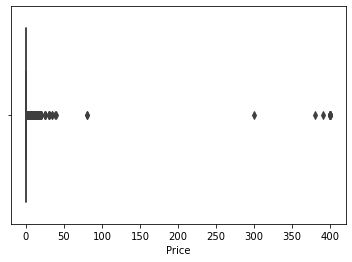

In [25]:
# Importing Seaborn library
## Univariant analysis
# Box plot for price. 


import seaborn as sns
sns.boxplot(data['Price'])

# usual price range is 0-50

C:\Users\akhilesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews'>

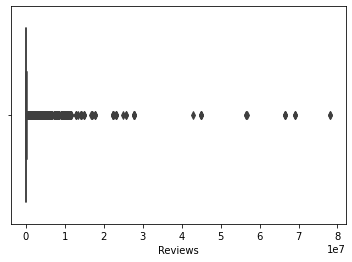

In [26]:
# Boxplot for Reviews. 

sns.boxplot(data['Reviews'])



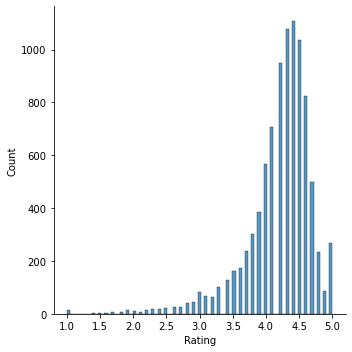

In [27]:
# Histogram for rating

sns.displot(data["Rating"])

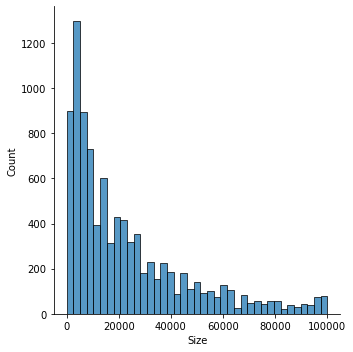

In [28]:
# Histogram for Size.

sns.displot(data["Size"])


In [29]:
## Outlier treatment
# checking record for high price

dt1=data[data.Price<200].copy()


In [30]:
data.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

C:\Users\akhilesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

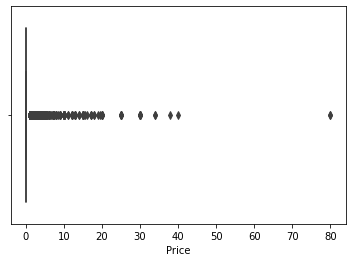

In [31]:
sns.boxplot(dt1.Price)


Q.7.2. Reviews: Very few apps have very high number of reviews. 
       These are all star apps that don’t help with the analysis and, in fact, will skew it.
       Drop records having more than 2 million reviews.

In [32]:
dt2=dt1[dt1.Reviews<2000000].copy()


Q.7.3.	Installs: There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.
    0.	Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
    1.	Decide a threshold as cutoff for outlier and drop records having values more than that

C:\Users\akhilesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Installs'>

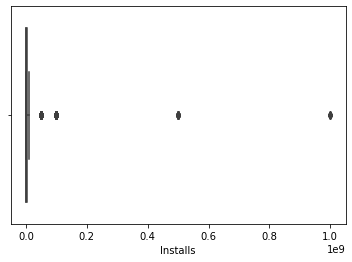

In [33]:
sns.boxplot(dt2['Installs'])

In [34]:
dt2.Installs.quantile([0.10,0.25,0.50,0.75,0.90,0.95,0.99])


0.10         1000.0
0.25        10000.0
0.50       500000.0
0.75      5000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [35]:
dt3=dt2[dt2.Installs<10000000].copy()


C:\Users\akhilesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Installs'>

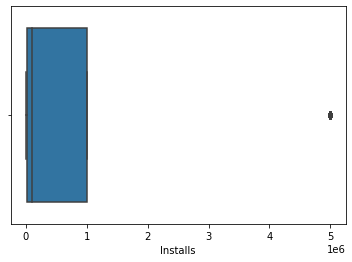

In [36]:
sns.boxplot(dt3['Installs'])

In [37]:
## Bivariant Analysis

import matplotlib.pyplot as plt

Text(0.5, 1.0, ' Rating vs. Price plot ')

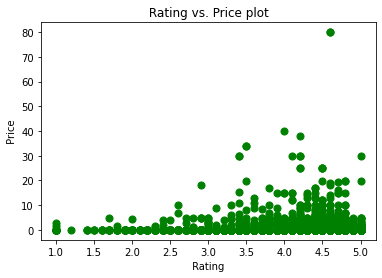

In [38]:
# scatter plot for rating and price


plt.scatter(dt3['Rating'], dt3['Price'], color='g', s=50 )

plt.xlabel ( " Rating " )
plt.ylabel ( " Price " )
plt.title ( " Rating vs. Price plot " )



Text(0.5, 1.0, ' Rating vs. Size plot ')

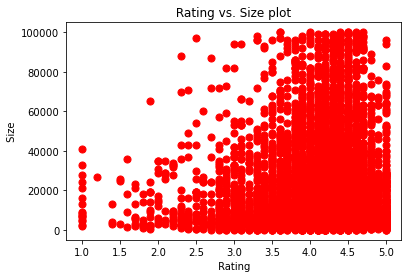

In [39]:
# scatter plot for rating and size


plt.scatter(dt3['Rating'], dt3['Size'], color='r', s=50 )


plt.xlabel ( " Rating " )
plt.ylabel ( " Size " )
plt.title ( " Rating vs. Size plot " )



Text(0.5, 1.0, ' Rating vs. Reviews plot ')

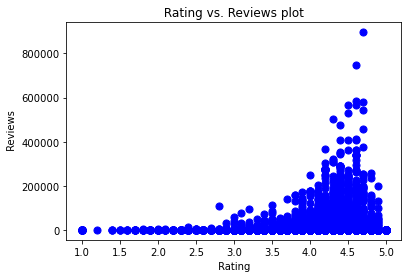

In [40]:
# scatter plot for rating and reviews

plt.scatter(dt3['Rating'], dt3['Reviews'], color='b', s=50 )

plt.xlabel ( " Rating " )
plt.ylabel ( " Reviews" )
plt.title ( " Rating vs. Reviews plot " )



C:\Users\akhilesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

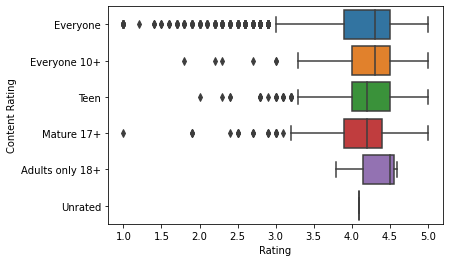

In [41]:
# Boxplot between Rating and Content rating

sns.boxplot("Rating","Content Rating",data=dt3)

# Mostly adults(18+) have always rated it high

C:\Users\akhilesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='Category'>

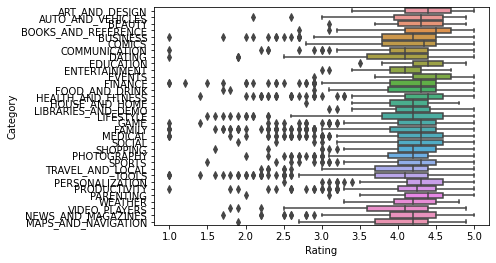

In [42]:
## Boxplot for Rating and Category

sns.boxplot("Rating","Category",data=dt3)

# ART and Design genre has best rating

In [43]:
## Data preprocessing


inp1=dt3.copy()

In [44]:
inp1['Reviews']=np.log1p(inp1['Reviews'])

In [45]:
inp1['Installs']=np.log1p(inp1['Installs'])

In [46]:
## droping unwanted columns

col_drop=['App','Last Updated','Current Ver', 'Android Ver']
inp2=inp1.drop(col_drop, axis=1).copy()


In [47]:
## getting dummy columns

list1=['Category','Type','Genres','Content Rating'] 
inp2=pd.get_dummies(inp2,columns=list1)


In [48]:
## Train test split and apply 70-30 split. Naming the new dataframes df_train and df_test.

from sklearn.model_selection import train_test_split
df_train, df_test=train_test_split(inp2,test_size=0.30,random_state=32)


In [49]:
print(df_train.shape)
print(df_test.shape)

(5080, 156)
(2178, 156)


In [50]:
## Separate the dataframes into X_train, y_train, X_test, and y_test.

df_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5080 entries, 10257 to 4455
Columns: 156 entries, Rating to Content Rating_Unrated
dtypes: float64(5), uint8(151)
memory usage: 987.2 KB


In [51]:
y_train=df_train.pop('Installs')

X_train=df_train

In [52]:
y_test=df_test.pop('Installs')

X_test=df_test

In [53]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5080, 155)
(2178, 155)
(5080,)
(2178,)


In [54]:
## Model building, Using linear regression as the technique


from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

In [55]:
y_pred=regressor.predict(X_test)
y_pred

array([10.60013094, 16.15975191, 13.11246457, ..., 10.80876444,
        9.73196929,  9.96739275])

In [56]:
from sklearn import metrics
print(metrics.r2_score(y_test,y_pred))

# 90% accuracy reported

0.9084390525833401
